In [ ]:
import numpy as np
import pandas as pd
from functools import cache
from tqdm import tqdm
from itertools import combinations

# Feature Engineering


In [2]:
batting_data = pd.read_parquet("data/batting_full.parquet.gz")
pitching_data = pd.read_parquet("data/pitching_full.parquet.gz")

## Batting


In [3]:
batting_cols = [
    # Meta
    "IDfg",
    "Season",
    "Team",
    "Age",
    # Normalization
    "AB",
    # Stats
    # Bonus
    "R",
    "H",
    "RBI",
    # "Lob",
    "OPS",  # TODO: how to get OPS+?
    "WAR",
    "OBP+",
    "2B",
    "3B",
    "HR",
    "CS",
    "SB",
    "SO",
    # Left-handed?
]
batting_cleaned = batting_data[batting_cols].dropna()
batting_cleaned = batting_cleaned[batting_cleaned["AB"] > 0]
# Normalize for at-bats
for col in ["R", "H", "RBI", "OPS", "2B", "3B", "HR", "SO", "CS", "SB"]:
    batting_cleaned[col] /= batting_cleaned["AB"]
batting_cleaned.rename(columns={"AB": "weight"}, inplace=True)

In [4]:
list(batting_data.columns)

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Fld',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'phLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'FA% (sc)',
 

In [5]:
batting_cleaned.head()

,IDfg,Season,Team,Age,weight,R,H,RBI,OPS,WAR,OBP+,2B,3B,HR,CS,SB,SO
0,1008559,1998,STL,34,509,0.255403,0.298625,0.288802,0.002401,8.5,138.0,0.041257,0.000000,0.137525,0.000000,0.001965,0.304519
1,1109,1998,SFG,33,552,0.217391,0.302536,0.221014,0.001897,8.5,129.0,0.079710,0.012681,0.067029,0.021739,0.050725,0.166667
2,1093,1998,NYM,29,557,0.163375,0.353680,0.166966,0.001792,8.1,132.0,0.064632,0.007181,0.039497,0.003591,0.003591,0.131059
3,1274,1998,SEA,22,686,0.179300,0.310496,0.180758,0.001340,7.9,106.0,0.051020,0.007289,0.061224,0.018950,0.067055,0.176385
4,190,1998,BOS,24,604,0.183775,0.322848,0.201987,0.001566,7.3,106.0,0.061258,0.013245,0.057947,0.009934,0.019868,0.102649


In [6]:
# Save
batting_cleaned.to_parquet("data/batting_cleaned.parquet.gz", compression="gzip")

## Pitching


In [7]:
pitching_cols = [
    # Meta
    "IDfg",
    "Season",
    "Team",
    "Age",
    # Normalization
    "TBF",
    # Stats
    "ERA-",
    "H",
    "HR",
    "BB",
    "SO",
]

pitching_cleaned = pitching_data[pitching_cols].dropna()
pitching_cleaned = pitching_cleaned[pitching_cleaned["TBF"] > 0]
# Normalize for batters faced
for col in ["H", "HR", "BB", "SO"]:
    pitching_cleaned[col] /= pitching_cleaned["TBF"]
pitching_cleaned.rename(columns={"TBF": "weight"}, inplace=True)

In [8]:
pitching_cleaned.head()

,IDfg,Season,Team,Age,weight,ERA-,H,HR,BB,SO
0,642,1998,SDP,33,1032,60,0.218023,0.007752,0.047481,0.249031
1,73,1998,PHI,31,1089,76,0.216713,0.021120,0.056015,0.275482
2,815,1998,TOR,35,961,57,0.175858,0.011446,0.091571,0.281998
3,60,1998,- - -,34,1014,72,0.200197,0.022682,0.084813,0.324458
4,104,1998,ATL,32,987,53,0.203647,0.013171,0.045593,0.206687


In [9]:
#  Save
pitching_cleaned.to_parquet("data/pitching_cleaned.parquet.gz", compression="gzip")

## Schedule/Record


In [10]:
curr_teams = [
    "NYY",
    "KCR",
    "LAD",
    "BAL",
    "NYM",
    "BOS",
    "CLE",
    "CIN",
    "ARI",
    "TOR",
    "SFG",
    "MIL",
    "SEA",
    "HOU",
    "SDP",
    "PHI",
    "OAK",
    "ATL",
    "TEX",
    "MIN",
    "CHC",
    "DET",
    "COL",
    "STL",
    "PIT",
    "LAA",
    "WSN",
    "MIA",
    "TBR",
    "CHW",
]

renames = {
    "ANA": "LAA",
    "FLA": "MIA",
    "MON": "WSN",
    "TBD": "TBR",
}

In [11]:
schedules = pd.read_parquet("data/schedules_full.parquet.gz")

In [12]:
schedules.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,Season
0,"Wednesday, Apr 1",NYY,@,ANA,L,1.0,4.0,9.0,0-1,5.0,...,Finley,Pettitte,Percival,2:52,N,43311.0,1.00,-1.0,None,1998
1,"Thursday, Apr 2",NYY,@,ANA,L,2.0,10.0,9.0,0-2,5.0,...,Hill,Wells,None,3:19,N,29899.0,.95,-2.0,None,1998
2,"Saturday, Apr 4",NYY,@,OAK,L,3.0,7.0,9.0,0-3,5.0,...,Haynes,Cone,None,2:57,D,17118.0,.93,-3.0,None,1998
3,"Sunday, Apr 5",NYY,@,OAK,W,9.0,7.0,10.0,1-3,5.0,...,Nelson,Mohler,None,4:15,D,18109.0,.84,1.0,None,1998
4,"Monday, Apr 6",NYY,@,SEA,L,0.0,8.0,9.0,1-4,5.0,...,Moyer,Pettitte,None,3:08,N,27445.0,.88,-1.0,None,1998


In [13]:
def add_momentum_columns(df, prefix):
    # Remove win/loss of current game from season record to prevent data leakage
    won = df["W/L"].apply(lambda x: 1 if x == "W" else 0)
    lost = df["W/L"].apply(lambda x: 1 if x == "L" else 0)
    season_wins = df["W-L"].str.split("-").str[0].astype(int) - won
    season_losses = df["W-L"].str.split("-").str[1].astype(int) - lost

    df[prefix + "_wins_pct"] = (season_wins / (season_wins + season_losses)).fillna(0.5)
    df.drop(columns=["W/L", "W-L"], inplace=True)

In [14]:
# Get rid of data leakage in streak
def fix_streaks(df):
    for season in df.Season.unique():
        season_df = df[df.Season == season]
        for team in season_df.HomeTeam.unique():
            # Filter rows for the current team
            team_indices = (df.Season == season) & (df.HomeTeam == team)
            team_df = df.loc[team_indices]

            # Roll streaks forward
            df.loc[team_indices, "Streak"] = team_df.Streak.shift(1)

    # Fill NaN values with 0
    df.Streak.fillna(0, inplace=True)

In [15]:
schedules_cleaned = schedules[
    ["Tm", "Opp", "W/L", "W-L", "D/N", "Home_Away", "Season", "Date", "Streak"]
].copy()
# Rename columns
schedules_cleaned.rename(columns={"Tm": "HomeTeam", "Opp": "AwayTeam"}, inplace=True)
# Rename Teams: TODO: figure out why this isn't working
# schedules_cleaned["Tm"] = schedules_cleaned["Tm"].replace(renames)
# schedules_cleaned["Opp"] = schedules_cleaned["Opp"].replace(renames)
# Drop non-current teams
schedules_cleaned = schedules_cleaned[
    schedules_cleaned["HomeTeam"].isin(curr_teams)
    & schedules_cleaned["AwayTeam"].isin(curr_teams)
]
# Drop pre-1999
schedules_cleaned = schedules_cleaned[schedules_cleaned["Season"] > 1998]
# Drop ties
schedules_cleaned = schedules_cleaned[schedules_cleaned["W/L"] != "T"]
# Roll streak forward to avoid data leakage
fix_streaks(schedules_cleaned)

# Add dummies
schedules_cleaned["Day"] = schedules_cleaned["D/N"].str.contains("D").astype(int)
schedules_cleaned["Win"] = schedules_cleaned["W/L"].str.contains("W").astype(int)

# Add momentum columns + drop home games
home_mask = schedules_cleaned["Home_Away"] == "Home"
away_games = schedules_cleaned[~home_mask].copy()
home_games = schedules_cleaned[home_mask].copy()
add_momentum_columns(away_games, "away")
add_momentum_columns(home_games, "home")

In [16]:
away_games.head()

,HomeTeam,AwayTeam,D/N,Home_Away,Season,Date,Streak,Day,Win,away_wins_pct
4216,NYY,OAK,N,@,1999,"Monday, Apr 5",0.0,0,0,0.500000
4217,NYY,OAK,N,@,1999,"Tuesday, Apr 6",-1.0,0,1,0.000000
4218,NYY,OAK,D,@,1999,"Wednesday, Apr 7",1.0,1,1,0.500000
4225,NYY,DET,N,@,1999,"Friday, Apr 16",-1.0,0,0,0.777778
4226,NYY,DET,D,@,1999,"Saturday, Apr 17",-2.0,1,0,0.700000


In [17]:
# # Merge home and away games
schedules_cleaned = pd.merge(
    home_games,
    away_games,
    left_on=["Date", "Season", "HomeTeam"],
    right_on=["Date", "Season", "AwayTeam"],
    suffixes=(None, "_away"),
    validate="1:1",
)
schedules_cleaned.rename(
    columns={"Streak": "home_streak", "Streak_away": "away_streak"}, inplace=True
)
schedules_cleaned.drop(
    columns=schedules_cleaned.columns[schedules_cleaned.columns.str.endswith("_away")],
    inplace=True,
)
schedules_cleaned.drop(columns=["D/N", "Home_Away"], inplace=True)

In [18]:
schedules_cleaned.head(20)

,HomeTeam,AwayTeam,Season,Date,home_streak,Day,Win,home_wins_pct,away_streak,away_wins_pct
0,NYY,DET,1999,"Friday, Apr 9",2.0,1,1,0.666667,-2.0,0.333333
1,NYY,DET,1999,"Saturday, Apr 10",3.0,1,1,0.750000,-3.0,0.250000
2,NYY,DET,1999,"Sunday, Apr 11",4.0,1,1,0.800000,-4.0,0.200000
3,NYY,BAL,1999,"Tuesday, Apr 13",5.0,0,1,0.833333,-1.0,0.333333
4,NYY,BAL,1999,"Wednesday, Apr 14",6.0,0,1,0.857143,-2.0,0.285714
5,NYY,BAL,1999,"Thursday, Apr 15",7.0,0,0,0.875000,-3.0,0.250000
6,NYY,TEX,1999,"Tuesday, Apr 20",-4.0,0,1,0.583333,1.0,0.538462
7,NYY,TEX,1999,"Wednesday, Apr 21",1.0,0,1,0.615385,-1.0,0.500000
8,NYY,TOR,1999,"Friday, Apr 23",2.0,0,1,0.642857,5.0,0.750000
9,NYY,TOR,1999,"Saturday, Apr 24",3.0,1,1,0.666667,-1.0,0.705882


In [19]:
assert schedules_cleaned.isna().sum().sum() == 0
schedules_cleaned.to_parquet("data/schedules_cleaned.parquet.gz", compression="gzip")
schedules_cleaned.head()

,HomeTeam,AwayTeam,Season,Date,home_streak,Day,Win,home_wins_pct,away_streak,away_wins_pct
0,NYY,DET,1999,"Friday, Apr 9",2.0,1,1,0.666667,-2.0,0.333333
1,NYY,DET,1999,"Saturday, Apr 10",3.0,1,1,0.750000,-3.0,0.250000
2,NYY,DET,1999,"Sunday, Apr 11",4.0,1,1,0.800000,-4.0,0.200000
3,NYY,BAL,1999,"Tuesday, Apr 13",5.0,0,1,0.833333,-1.0,0.333333
4,NYY,BAL,1999,"Wednesday, Apr 14",6.0,0,1,0.857143,-2.0,0.285714


## Add Player Features to Schedules


In [20]:
@cache
def get_players(Team, Season):
    batting = batting_cleaned[
        (batting_cleaned["Team"] == Team) & (batting_cleaned["Season"] == Season)
    ]["IDfg"].unique()
    pitching = pitching_cleaned[
        (pitching_cleaned["Team"] == Team) & (pitching_cleaned["Season"] == Season)
    ]["IDfg"].unique()
    return batting, pitching

In [21]:
@cache
def get_team_stats(Team, Season):
    batting_players, pitching_players = get_players(Team, Season)
    if len(batting_players) == 0 or len(pitching_players) == 0:
        raise ValueError("No players", Team, Season)
    agg = {}

    # BATTING
    prior_season_batting = []
    batting_rookies = 0
    for player in batting_players:
        player_data = batting_cleaned[
            (batting_cleaned["IDfg"] == player)
            & (batting_cleaned["Season"] == Season - 1)
        ]
        if len(player_data) == 0:
            batting_rookies += 1
        else:
            prior_season_batting.append(player_data)
    if len(prior_season_batting) == 0:
        raise ValueError("No prior season batting data", Team, Season)

    batting_data = pd.concat(prior_season_batting)
    batting_data.drop(columns=["IDfg", "Season", "Team"], inplace=True)
    for col in batting_data.columns:
        if col == "weight":
            continue
        weights = batting_data["weight"].to_numpy()
        weighted_mean = np.average(batting_data[col], weights=weights)
        agg[f"batting_{col}_mean"] = weighted_mean
        # Bessel's correction for unbiased weighted sample variance
        agg[f"batting_{col}_var"] = np.sum(
            weights * (batting_data[col] - weighted_mean) ** 2
        ) / (np.sum(weights) - 1)
    agg["batting_rookies"] = batting_rookies

    # PITCHING
    prior_season_pitching = []
    pitching_rookies = 0
    for player in pitching_players:
        player_data = pitching_cleaned[
            (pitching_cleaned["IDfg"] == player)
            & (pitching_cleaned["Season"] == Season - 1)
        ]
        if len(player_data) == 0:
            pitching_rookies += 1
        else:
            prior_season_pitching.append(player_data)
    if len(prior_season_pitching) == 0:
        raise ValueError("No prior season pitching data", Team, Season)

    pitching_data = pd.concat(prior_season_pitching)
    pitching_data.drop(columns=["IDfg", "Season", "Team"], inplace=True)
    for col in pitching_data.columns:
        if col == "weight":
            continue
        weights = pitching_data["weight"].to_numpy()
        weighted_mean = np.average(pitching_data[col], weights=weights)
        agg[f"pitching_{col}_mean"] = weighted_mean
        # Bessel's correction for unbiased weighted sample variance
        agg[f"pitching_{col}_var"] = np.sum(
            weights * (pitching_data[col] - weighted_mean) ** 2
        ) / (np.sum(weights) - 1)
    agg["pitching_rookies"] = pitching_rookies

    return agg


In [22]:
new_rows = []
for season in tqdm(schedules_cleaned.Season.unique()):
    season_df = schedules_cleaned[schedules_cleaned.Season == season]
    season_teams = set(season_df.HomeTeam.unique()) | set(season_df.AwayTeam.unique())

    for team1, team2 in combinations(season_teams, 2):
        team1_matchups = season_df[
            (season_df["HomeTeam"] == team1) & (season_df["AwayTeam"] == team2)
        ]
        team2_matchups = season_df[
            (season_df["HomeTeam"] == team2) & (season_df["AwayTeam"] == team1)
        ]
        if len(team1_matchups) == 0 or len(team2_matchups) == 0:
            continue
        team1_stats = get_team_stats(team1, season)
        team2_stats = get_team_stats(team2, season)

        features = {}
        for key, value in team1_stats.items():
            features[f"team1_{key}"] = value
        for key, value in team2_stats.items():
            features[f"team2_{key}"] = value
        features["Season"] = season
        features["win_rate"] = team1_matchups["Win"].mean()

        # Check for nan
        if np.isnan(features["win_rate"]):
            print("AHHH", team1_matchups.Win[:10])
            continue

        # Add row
        new_rows.append(features)

new_df = pd.DataFrame(new_rows)

100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


In [23]:
new_features = []
for i, row in tqdm(schedules_cleaned.iterrows(), total=len(schedules_cleaned)):
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    season = row["Season"]
    features = {}
    home_stats = get_team_stats(home_team, season)
    for key, value in home_stats.items():
        if np.isnan(value):
            print(home_team, season, key)
        features[f"home_{key}"] = value
    away_stats = get_team_stats(away_team, season)
    for key, value in away_stats.items():
        if np.isnan(value):
            print(away_team, season, key)
        features[f"away_{key}"] = value
    new_features.append(features)
new_features = pd.DataFrame(new_features)

100%|██████████| 56347/56347 [00:03<00:00, 15771.17it/s]


In [24]:
# Day/Month Features
schedules_cleaned["Day"] = schedules_cleaned["Date"].str.split(",").str[0].str.lower()
schedules_cleaned["Month"] = schedules_cleaned["Date"].str.split().str[1].str.lower()
# Add Dummies
day_dummies = pd.get_dummies(schedules_cleaned["Day"])
month_dummies = pd.get_dummies(schedules_cleaned["Month"])
schedules_cleaned = pd.concat([schedules_cleaned, day_dummies, month_dummies], axis=1)
schedules_cleaned.drop(columns=["Day", "Month"], inplace=True)

In [25]:
final_data = pd.concat(
    [schedules_cleaned.reset_index(drop=True), new_features.reset_index(drop=True)],
    axis=1,
)
assert final_data.isna().sum().sum() == 0
final_data.to_parquet("data/final_data.parquet.gz", compression="gzip")
final_data.head()

,HomeTeam,AwayTeam,Season,Date,home_streak,Win,home_wins_pct,away_streak,away_wins_pct,friday,...,away_pitching_ERA-_var,away_pitching_H_mean,away_pitching_H_var,away_pitching_HR_mean,away_pitching_HR_var,away_pitching_BB_mean,away_pitching_BB_var,away_pitching_SO_mean,away_pitching_SO_var,away_pitching_rookies
0,NYY,DET,1999,"Friday, Apr 9",2.0,1,0.666667,-2.0,0.333333,True,...,270.105447,0.231144,0.000500,0.027963,0.000128,0.087224,0.000674,0.159312,0.00114,8
1,NYY,DET,1999,"Saturday, Apr 10",3.0,1,0.750000,-3.0,0.250000,False,...,270.105447,0.231144,0.000500,0.027963,0.000128,0.087224,0.000674,0.159312,0.00114,8
2,NYY,DET,1999,"Sunday, Apr 11",4.0,1,0.800000,-4.0,0.200000,False,...,270.105447,0.231144,0.000500,0.027963,0.000128,0.087224,0.000674,0.159312,0.00114,8
3,NYY,BAL,1999,"Tuesday, Apr 13",5.0,1,0.833333,-1.0,0.333333,False,...,480.827063,0.245114,0.000671,0.024324,0.000025,0.075676,0.000484,0.169439,0.00182,4
4,NYY,BAL,1999,"Wednesday, Apr 14",6.0,1,0.857143,-2.0,0.285714,False,...,480.827063,0.245114,0.000671,0.024324,0.000025,0.075676,0.000484,0.169439,0.00182,4


# Model Selection + Training


In [39]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, ElasticNet
import lightgbm as lgb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline, Pipeline
import optuna
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

plt.rcParams["figure.dpi"] = 300

In [27]:
def best_accuracy(y_true, y_prob):
    best_acc = 0
    best_threshold = 0
    for threshold in np.linspace(0, 1, 100):
        y_pred = y_prob > threshold
        acc = accuracy_score(y_true, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_threshold = threshold
    return best_acc, best_threshold

## Classification Version


In [28]:
seasons = final_data.Season.unique()
train_seasons, test_seasons = train_test_split(seasons, test_size=0.2)
train_mask = final_data.Season.isin(train_seasons)
X = final_data.drop(columns=["HomeTeam", "AwayTeam", "Win", "Date"]).copy()
# Exclude all except "away_wins_pct" and "home_wins_pct"
# X = final_data[["away_wins_pct", "home_wins_pct"]].copy()
y = final_data.Win

X_train = X[train_mask]
X_test = X[~train_mask]
y_train = y[train_mask]
y_test = y[~train_mask]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_error: 0.429347


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

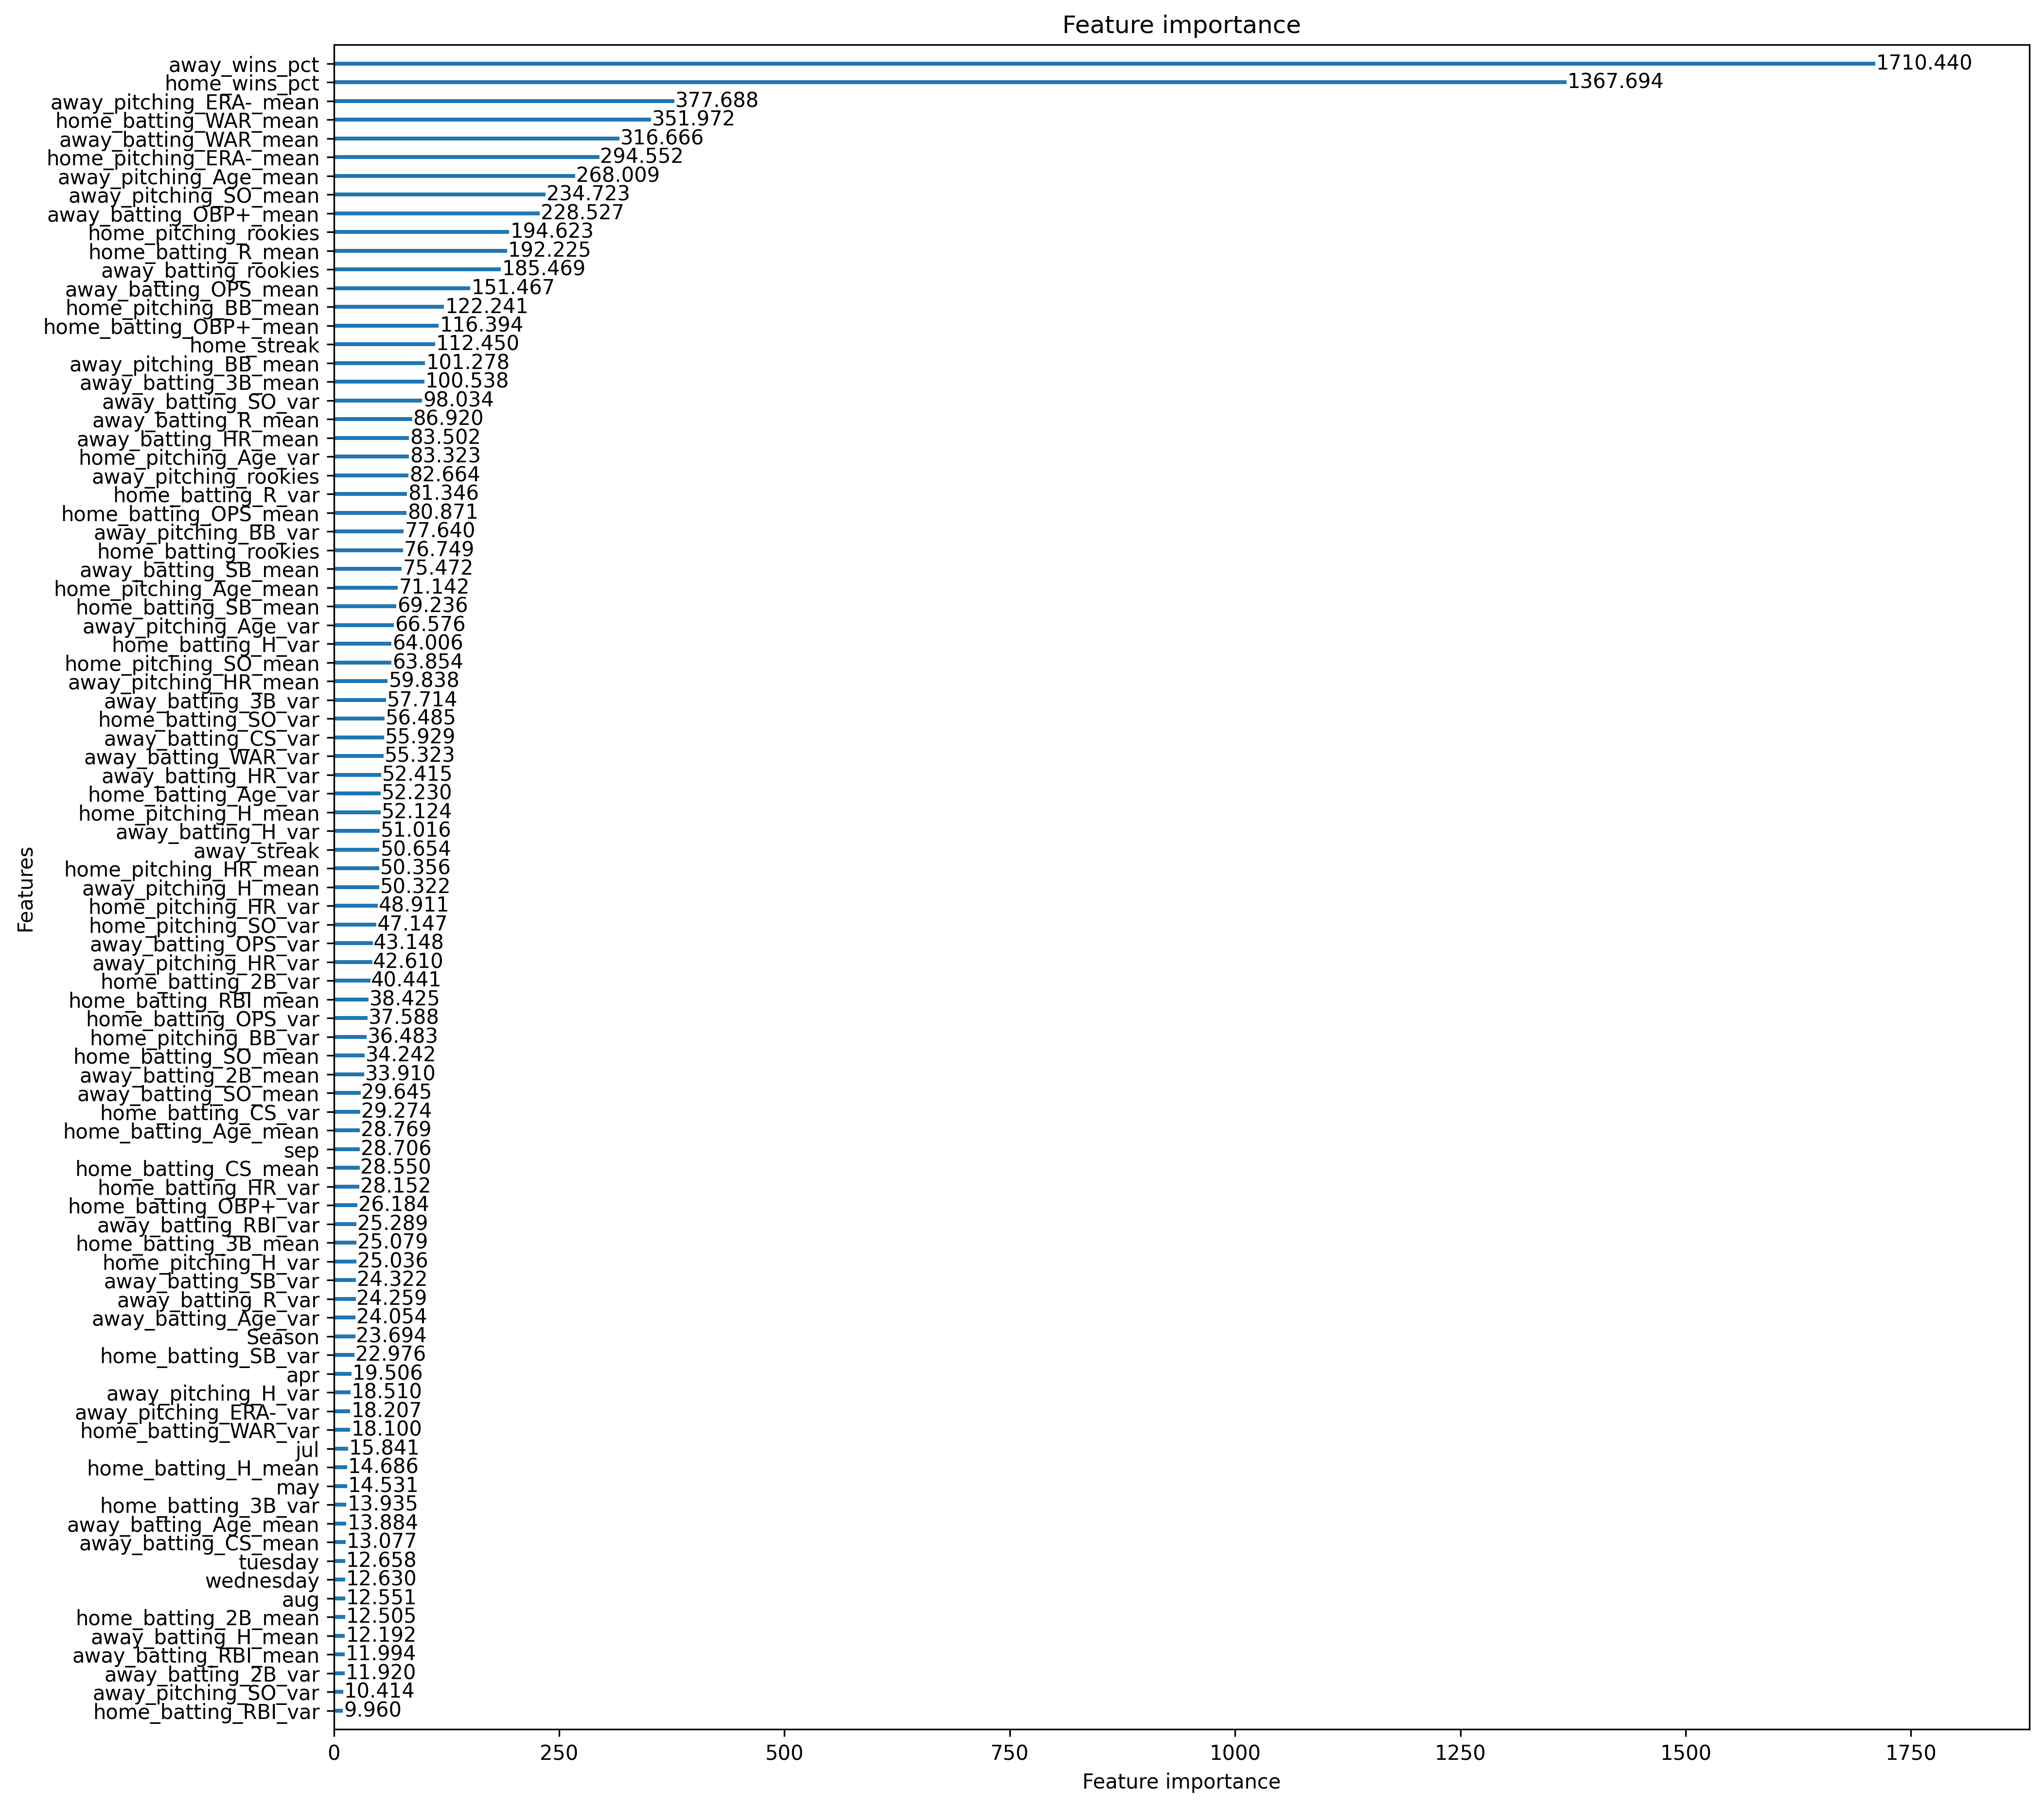

In [29]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_model = lgb.train(
    {
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
    },
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_test,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

lgb.plot_importance(lgb_model, importance_type="gain", figsize=(15, 15), grid=False)

In [30]:
# LGB Accuracy
acc, thres = best_accuracy(y_test, lgb_model.predict(X_test))
print(f"LGBM Accuracy: {acc*100:.2f}%, with {thres:.2f} threshold")

LGBM Accuracy: 57.07%, with 0.51 threshold


In [35]:
# Optuna LogisticRegression
def objective(trial):
    log_reg = make_pipeline(
        SimpleImputer(strategy="mean"),
        StandardScaler(),
        LogisticRegression(
            random_state=0,
            penalty="elasticnet",
            max_iter=1000,
            solver="saga",
            C=trial.suggest_float("C", 1e-10, 1e5, log=True),
            l1_ratio=trial.suggest_float("l1_ratio", 0.0, 1.0),
        ),
    )
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    return accuracy_score(y_test, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)

log_reg_study = optuna.create_study(direction="maximize")
log_reg_study.optimize(objective, n_trials=1000)

In [37]:
trial = log_reg_study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
optuna.visualization.plot_slice(log_reg_study)

Accuracy: 0.5720101781170484
Best hyperparameters: {'C': 0.006143534075514649, 'l1_ratio': 0.8943970373411257}


In [40]:
# RVCE with logistic regression
log_reg = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    RFECV(
        LogisticRegression(
            random_state=0,
            penalty="elasticnet",
            max_iter=1000,
            solver="saga",
            **trial.params,
        ),
        cv=5,
    ),
)
log_reg.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('rfecv',
                 RFECV(cv=5,
                       estimator=LogisticRegression(C=0.006143534075514649,
                                                    l1_ratio=0.8943970373411257,
                                                    max_iter=1000,
                                                    penalty='elasticnet',
                                                    random_state=0,
                                                    solver='saga')))])

In [43]:
# What features?
selected_features = X_train.columns[log_reg.named_steps["rfecv"].support_]

In [44]:
selected_features

Index(['home_wins_pct', 'away_wins_pct', 'mar', 'home_batting_R_mean',
       'home_batting_OPS_mean', 'home_batting_WAR_mean',
       'home_batting_rookies', 'home_pitching_ERA-_mean',
       'home_pitching_BB_mean', 'home_pitching_SO_mean',
       'home_pitching_rookies', 'away_batting_WAR_mean', 'away_batting_SO_var',
       'away_batting_rookies', 'away_pitching_Age_mean',
       'away_pitching_Age_var', 'away_pitching_ERA-_mean',
       'away_pitching_BB_mean', 'away_pitching_SO_mean',
       'away_pitching_rookies'],
      dtype='object')

In [42]:
# Acc
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.5706530958439355

In [ ]:
def objective(trial):
    lgb_model = lgb.train(
        {
            "objective": "binary",
            "metric": "binary_error",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "num_leaves": trial.suggest_int("num_leaves", 2, 256),
            "max_depth": trial.suggest_int("max_depth", 1, 32),
            "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.1, 1),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.1, 1),
            "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
            "lambda_l1": trial.suggest_float("lambda_l1", 1e-3, 1),
        },
        lgb_train,
        num_boost_round=1000,
        valid_sets=lgb_test,
        callbacks=[lgb.early_stopping(stopping_rounds=5)],
    )
    acc, _ = best_accuracy(y_test, lgb_model.predict(X_test))
    return acc


optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_error: 0.435088
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_error: 0.441615
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.459989
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_error: 0.441331
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.459989
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_error: 0.43601
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_error: 0.43601
Training until validation scores don't improve for 5 rounds
Early stoppin

In [ ]:
# Best params
best_params = study.best_params

# Train
lgb_model = lgb.train(
    {
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        **best_params,
    },
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_test,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_error: 0.426078


In [ ]:
# Acc
acc, thres = best_accuracy(y_test, lgb_model.predict(X_test))
print(f"LGBM Accuracy: {acc*100:.2f}%, with {thres:.2f} threshold")

LGBM Accuracy: 57.38%, with 0.49 threshold


In [32]:
log_reg = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    LogisticRegression(random_state=0),
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression R^2: {r2:.2f}")
print(f"Logistic Regression Accuracy: {acc*100:.2f}%")

Logistic Regression R^2: -0.75
Logistic Regression Accuracy: 56.56%


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
reg = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    SVC(probability=True, random_state=42, verbose=True),
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"SVC R^2: {r2:.2f}")
print(f"SVC Accuracy: {acc*100:.2f}%")

[LibSVM].........................*.......*..*
optimization finished, #iter = 33419
obj = -26203.690251, rho = -0.165783
nSV = 30749, nBSV = 26969
Total nSV = 30749
.........................*.......*
optimization finished, #iter = 32090
obj = -26256.962104, rho = -0.186190
nSV = 30826, nBSV = 27039
Total nSV = 30826
.........................*......*
optimization finished, #iter = 31826
obj = -26219.580191, rho = -0.182062
nSV = 30764, nBSV = 27050
Total nSV = 30764
.........................*......*.*
optimization finished, #iter = 31678
obj = -26212.530771, rho = -0.132766
nSV = 30781, nBSV = 27088
Total nSV = 30781
.........................*.......*
optimization finished, #iter = 32312
obj = -26259.229313, rho = -0.120032
nSV = 30845, nBSV = 27054
Total nSV = 30845
................................*........*
optimization finished, #iter = 40442
obj = -33024.952545, rho = 0.143124
nSV = 38355, nBSV = 33965
Total nSV = 38355
SVC R^2: -0.78
SVC Accuracy: 55.85%


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

## Regression Version


In [ ]:
seasons = new_df.Season.unique()
train_seasons, test_seasons = train_test_split(seasons, test_size=0.2)
train_mask = new_df.Season.isin(train_seasons)
X = new_df.drop(columns=["Season", "win_rate"]).copy()
y = new_df.win_rate

X_train = X[train_mask]
X_test = X[~train_mask]
y_train = y[train_mask]
y_test = y[~train_mask]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15673
[LightGBM] [Info] Number of data points in the train set: 4087, number of used features: 68
[LightGBM] [Info] Start training from score 0.534167
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's rmse: 0.260917


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

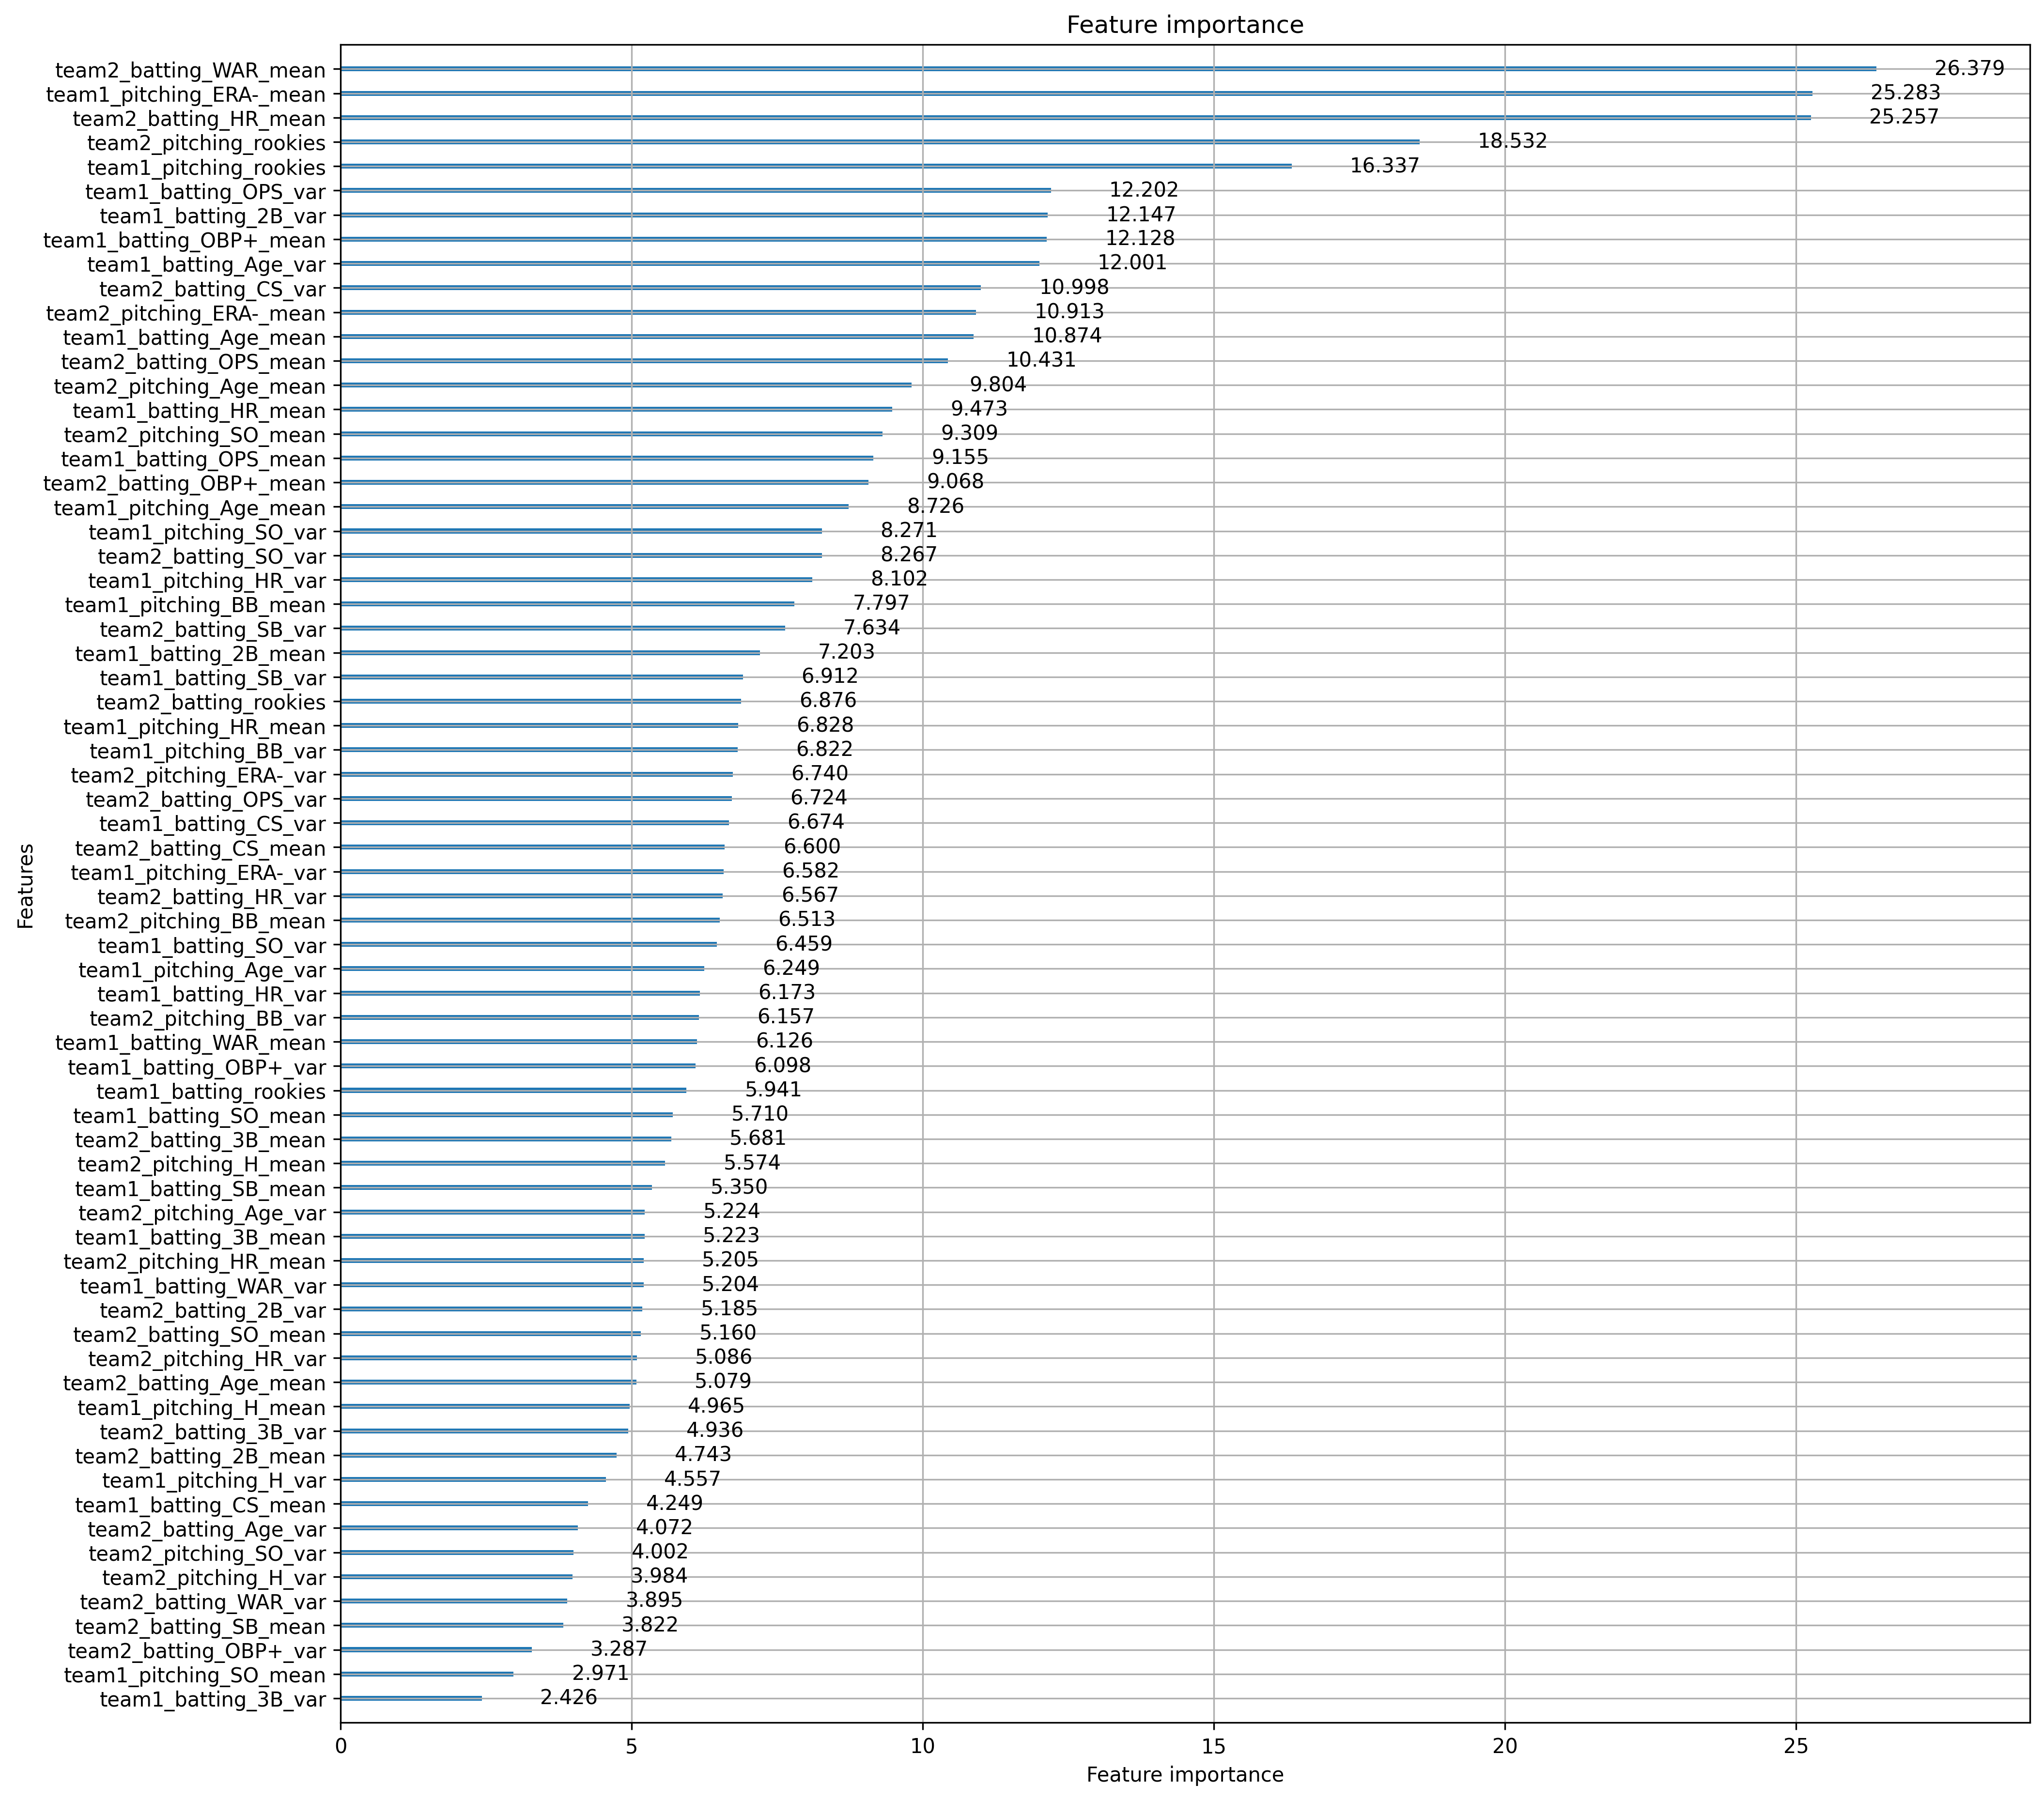

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_model = lgb.train(
    {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
    },
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_test,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

lgb.plot_importance(lgb_model, importance_type="gain", figsize=(15, 15), grid=False)

In [ ]:
# MSE
y_pred = lgb_model.predict(X_test)
r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)

0.06807779301290182

In [ ]:
reg = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    ElasticNet(l1_ratio=0),
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Regression R^2: {r2:.2f}")
print(f"Regression MSE: {mse:.2f}")

Regression R^2: 0.09
Regression MSE: 0.07


In [ ]:
y_pred_haha = y_pred > 0.5
accuracy_score(y_test > 0.5, y_pred_haha)

0.5713178294573643

In [ ]:
# StatsModels Regression
_X_train = sm.add_constant(X_train)
_X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, _X_train)
results = model.fit()
y_pred = results.predict(_X_test)

In [ ]:
y_pred_haha = y_pred > 0.5
accuracy_score(y_test > 0.5, y_pred_haha)

0.5775193798449613